# Explorative Analysis

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

daily = pd.read_csv('data/daily.csv', index_col=0)
weekly = pd.read_csv('data/weekly.csv', index_col=0)
monthly = pd.read_csv('data/monthly.csv', index_col=0)
trimestral = pd.read_csv('data/trimestral.csv', index_col=0)
yearly = pd.read_csv('data/yearly.csv', index_col=0)

mm30 = pd.read_csv('data/mm30.csv', index_col=0)
mm90 = pd.read_csv('data/mm90.csv', index_col=0)

daily.index = pd.to_datetime(daily.index)
monthly.index = pd.to_datetime(monthly.index)
trimestral.index = pd.to_datetime(trimestral.index)
yearly.index = pd.to_datetime(yearly.index)

mm30.index = pd.to_datetime(mm30.index)
mm90.index = pd.to_datetime(mm90.index)

In [60]:
plt.rcParams.update({'figure.dpi':150})

<AxesSubplot:xlabel='data'>

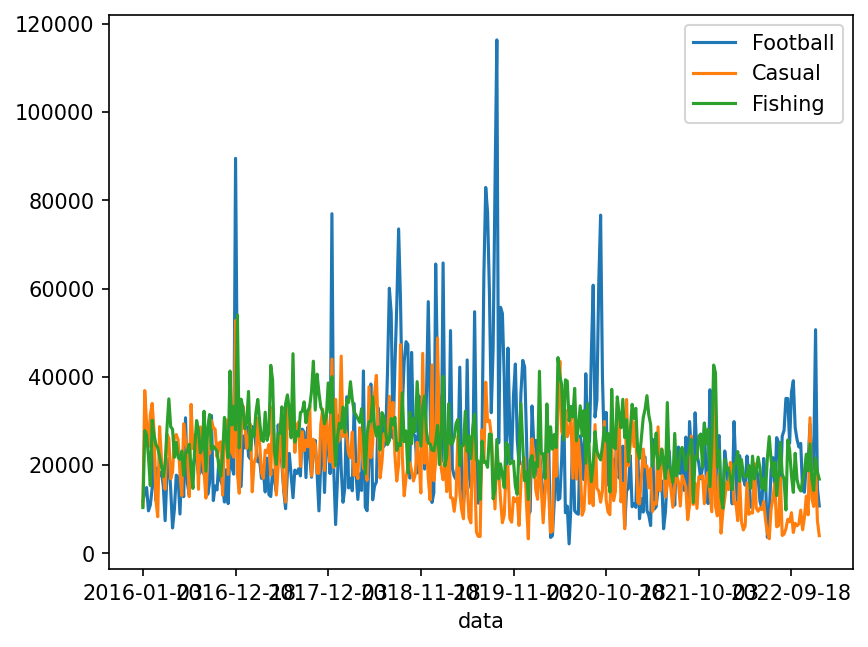

In [75]:
weekly.plot()

<AxesSubplot:xlabel='data'>

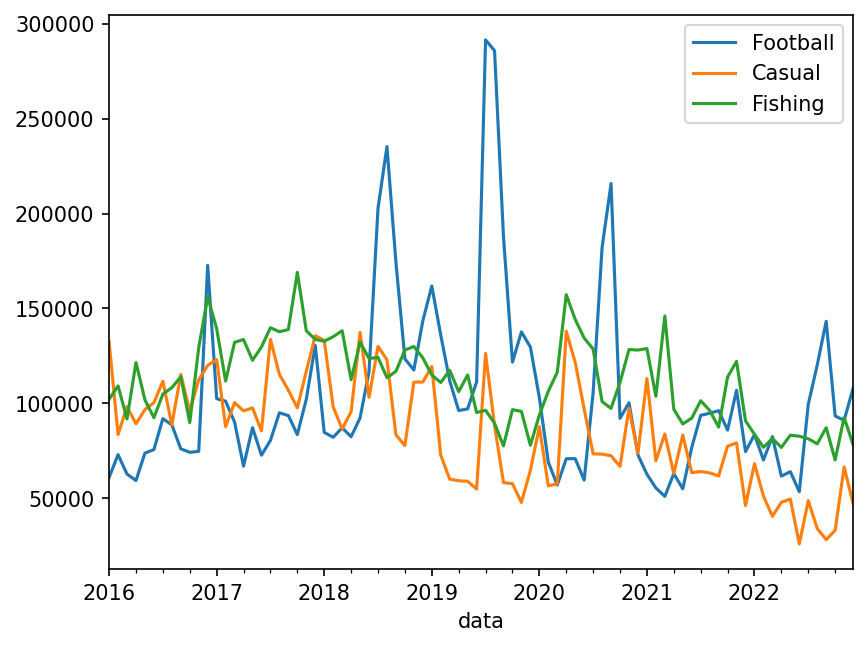

In [61]:
monthly.plot()

<AxesSubplot:xlabel='data'>

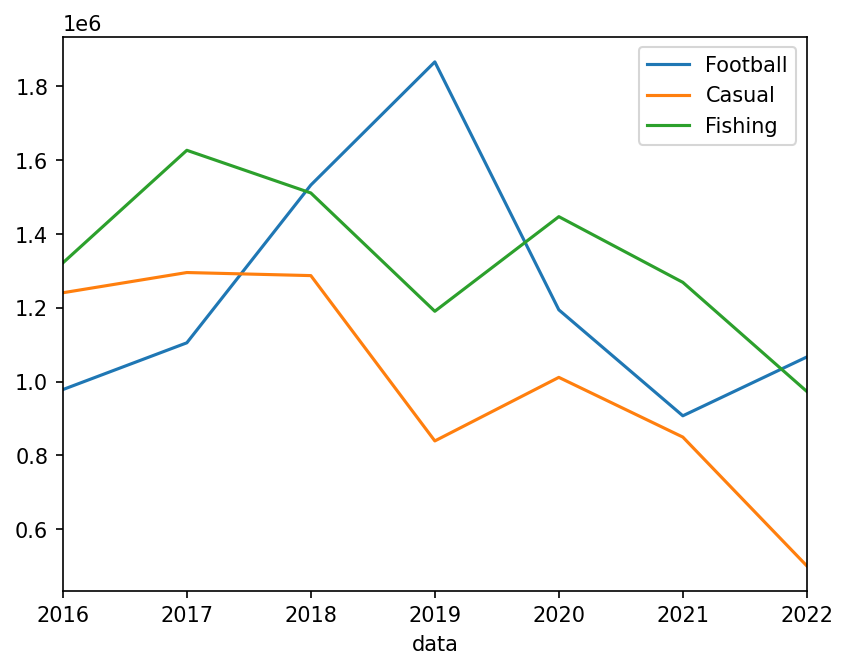

In [72]:
yearly.iloc[3:-1, :].plot()

<AxesSubplot:xlabel='Quarter'>

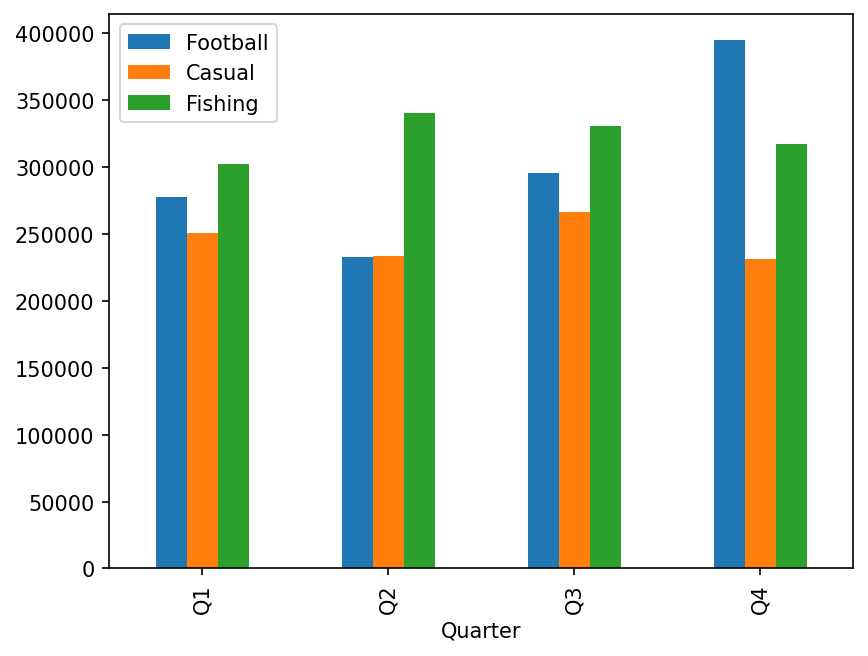

In [63]:
trimestral['Quarter'] = trimestral.index.quarter
trimestral['Quarter'] = trimestral['Quarter'].apply(lambda x: "Q"+str(x))

trimestral.groupby('Quarter').mean().plot.bar()

In [95]:
trimestral.to_csv('data/quarterly.csv')

<AxesSubplot:xlabel='Month'>

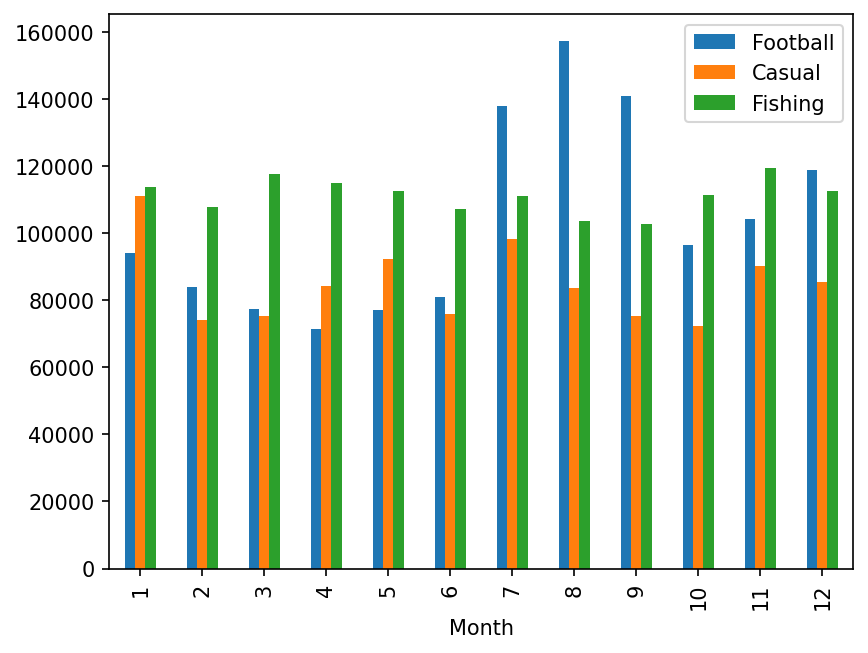

In [64]:
mmap = {i: x for i, x in enumerate(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])}
monthly['Month'] = monthly.index.month
monthly['Year'] = monthly.index.year

monthly.groupby('Month').mean().drop('Year', axis=1).plot.bar()

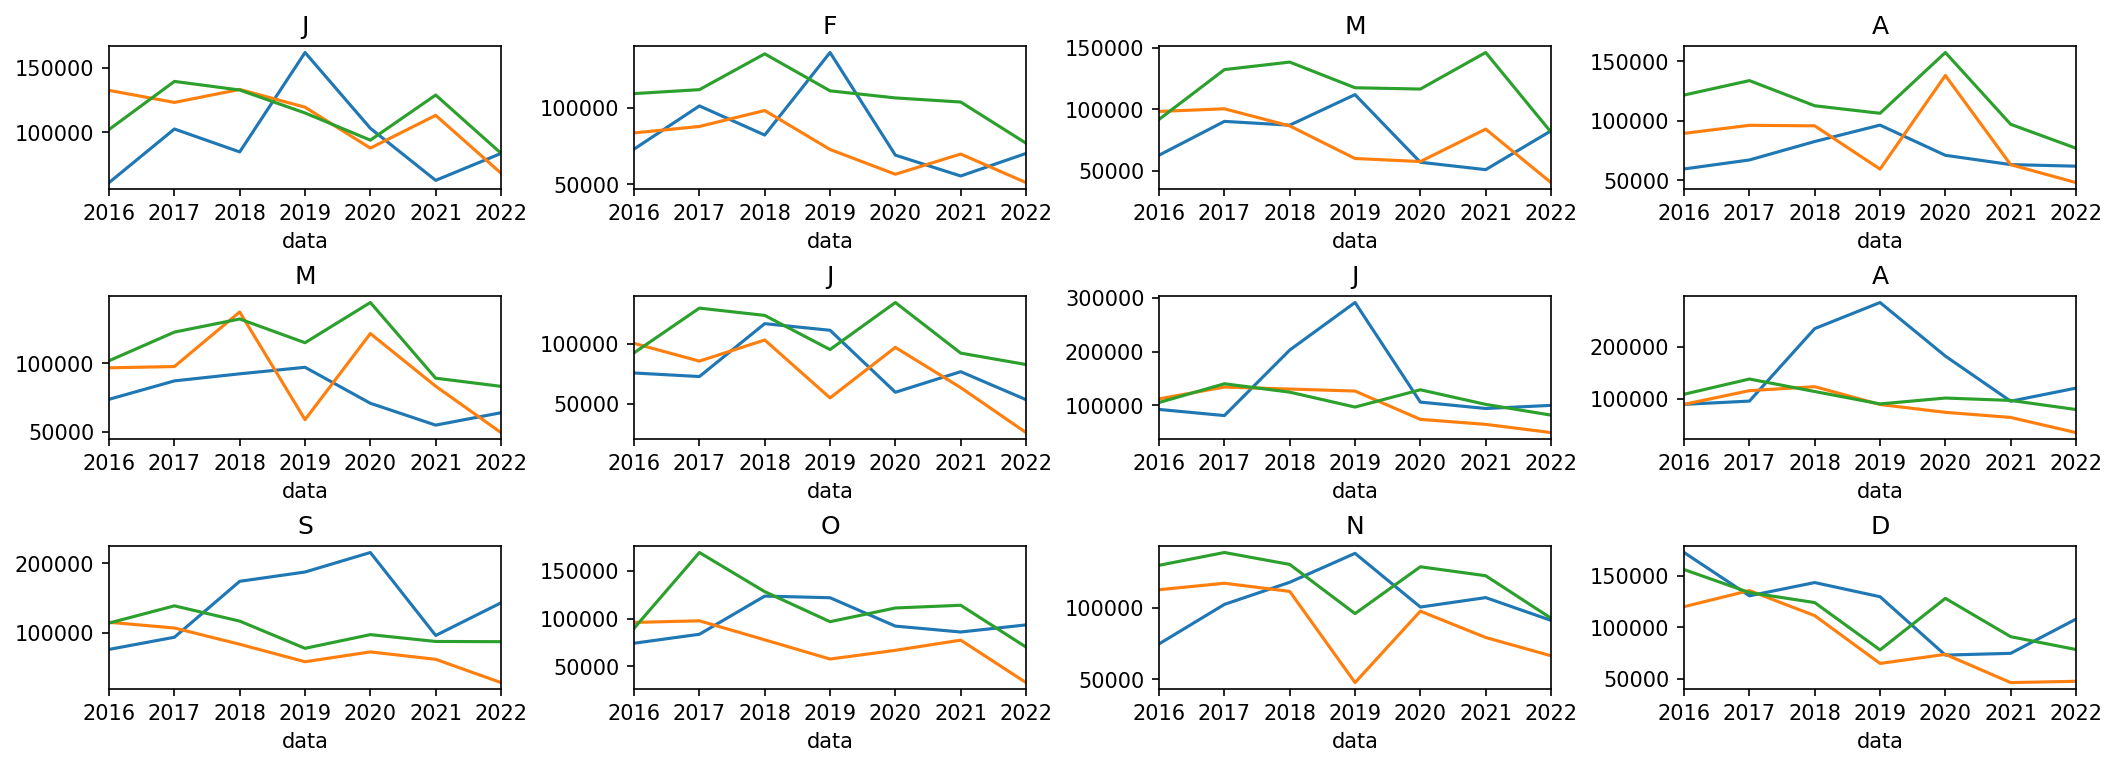

In [65]:
# Seasonal trend
fig, ax = plt.subplots(3,4, layout='constrained', figsize=(14,5))

for i in range(12):
    monthly[monthly['Month'] == i+1].drop(['Month', 'Year'], axis=1).plot(ax=ax[i // 4, i % 4], legend=False)
    ax[i // 4, i % 4].set_title(mmap[i])

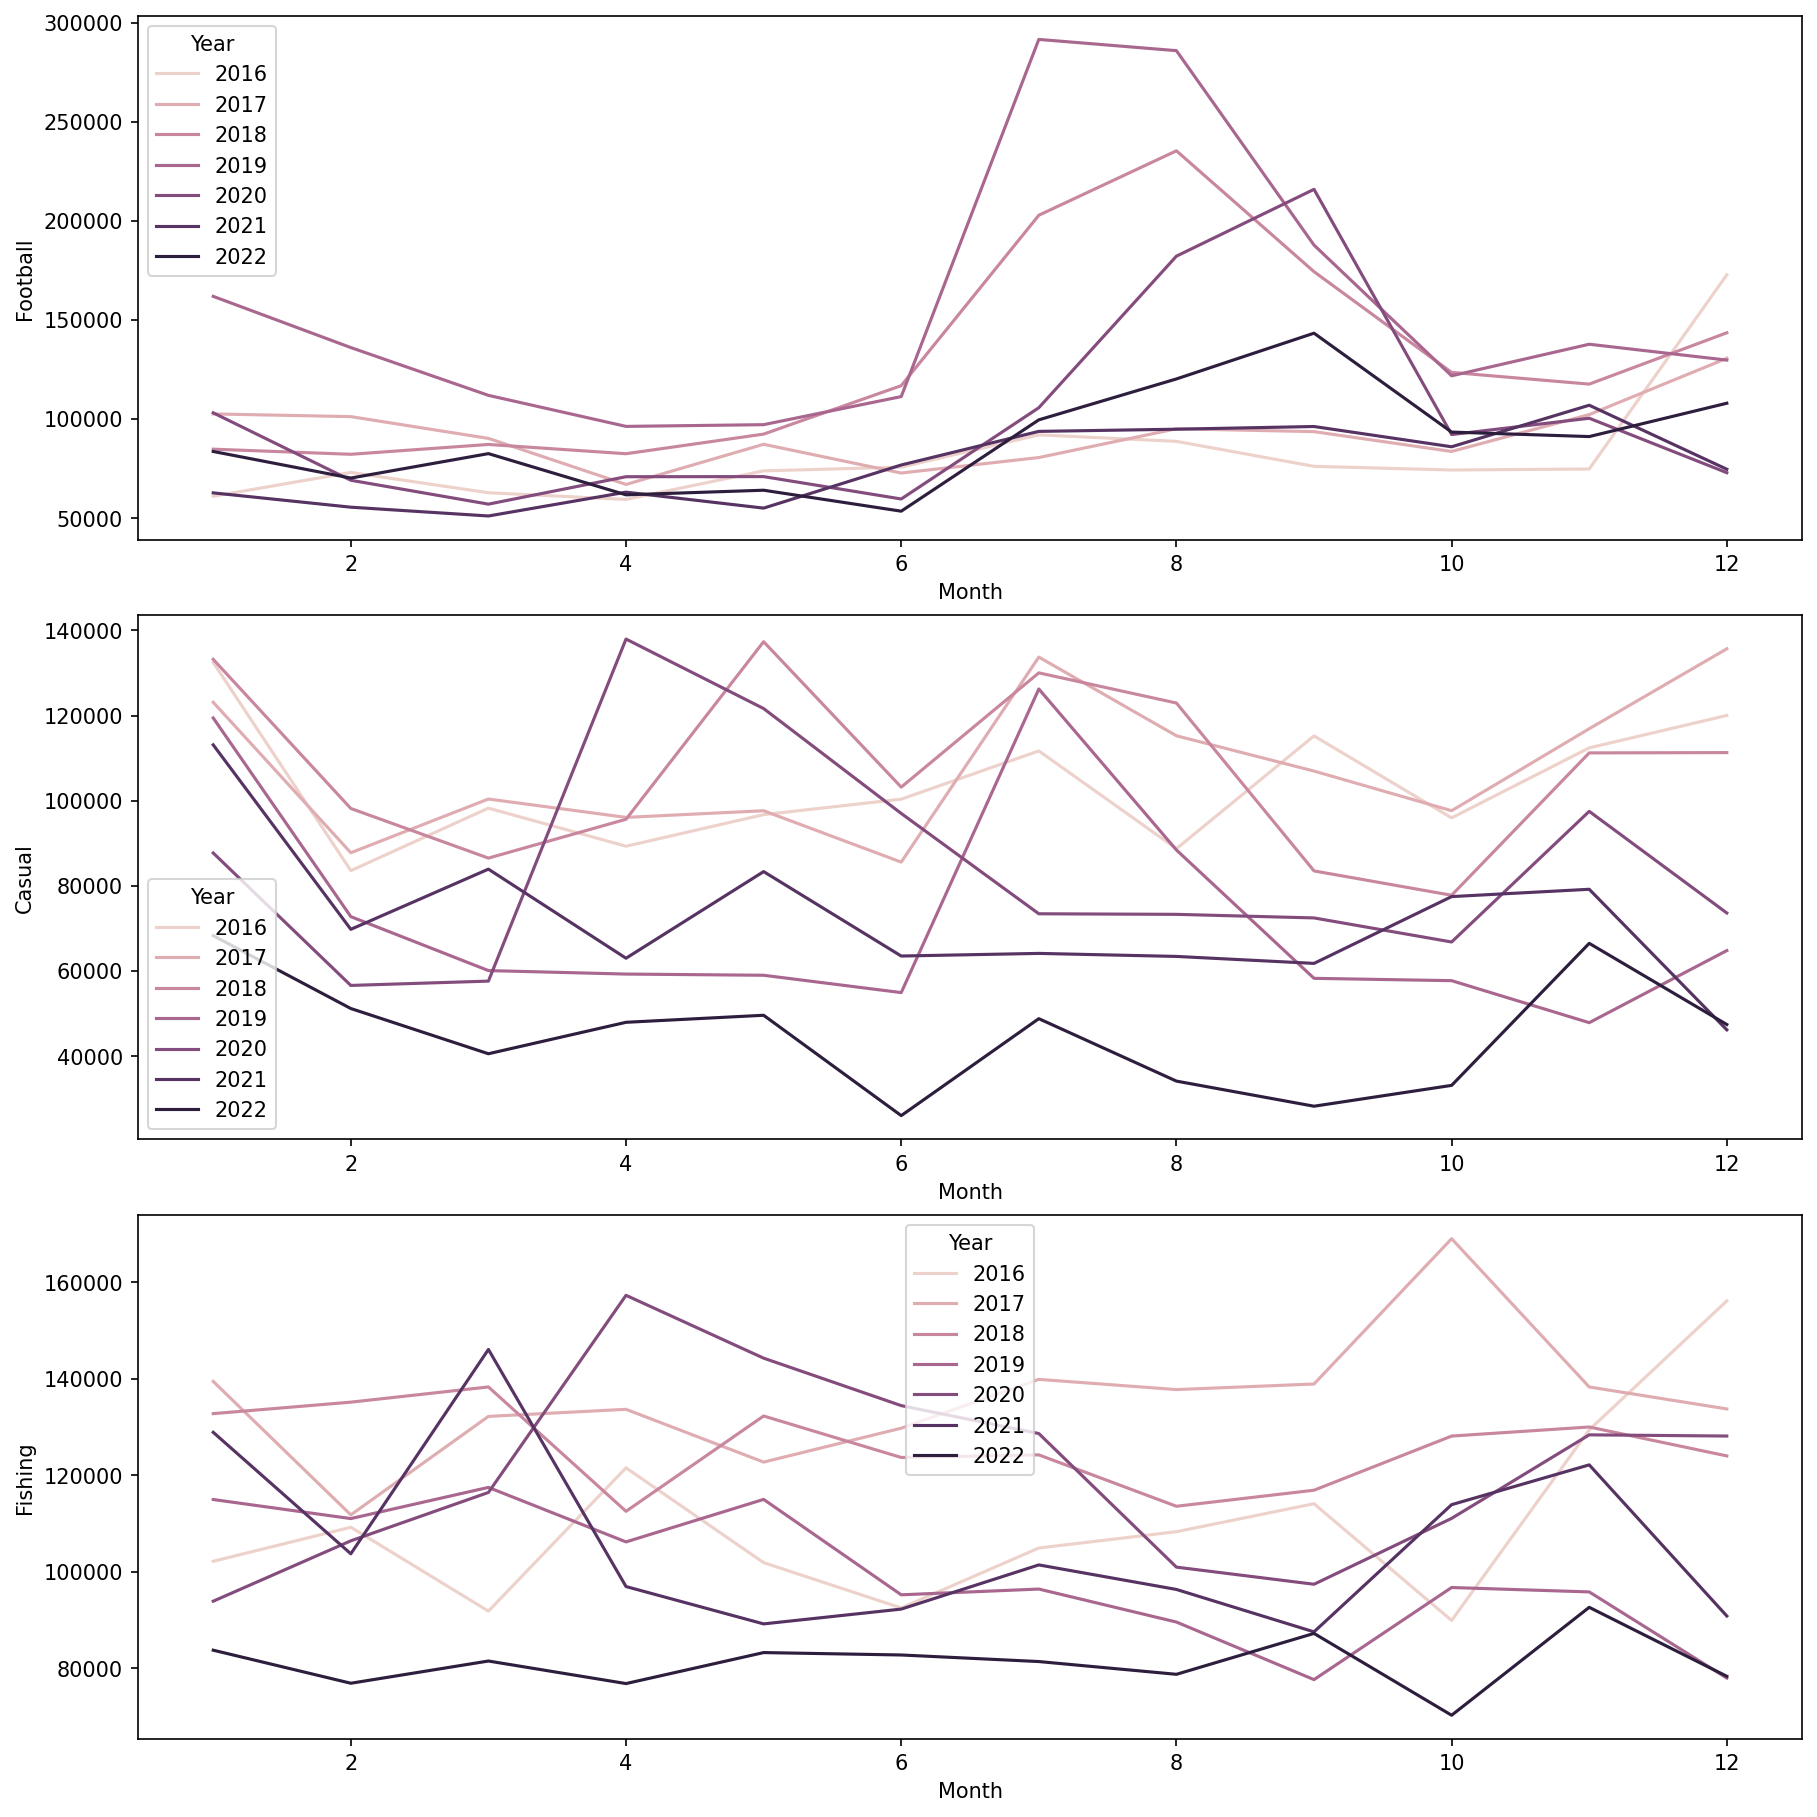

In [66]:
fig, ax = plt.subplots(3,1, layout='constrained', figsize=(12,12))

for i, col in enumerate(daily.columns):
    sns.lineplot(x=monthly['Month'], y=monthly[col], ax=ax[i], hue=monthly['Year'])

### Correlations

Text(0.5, 1.0, 'Quarterly')

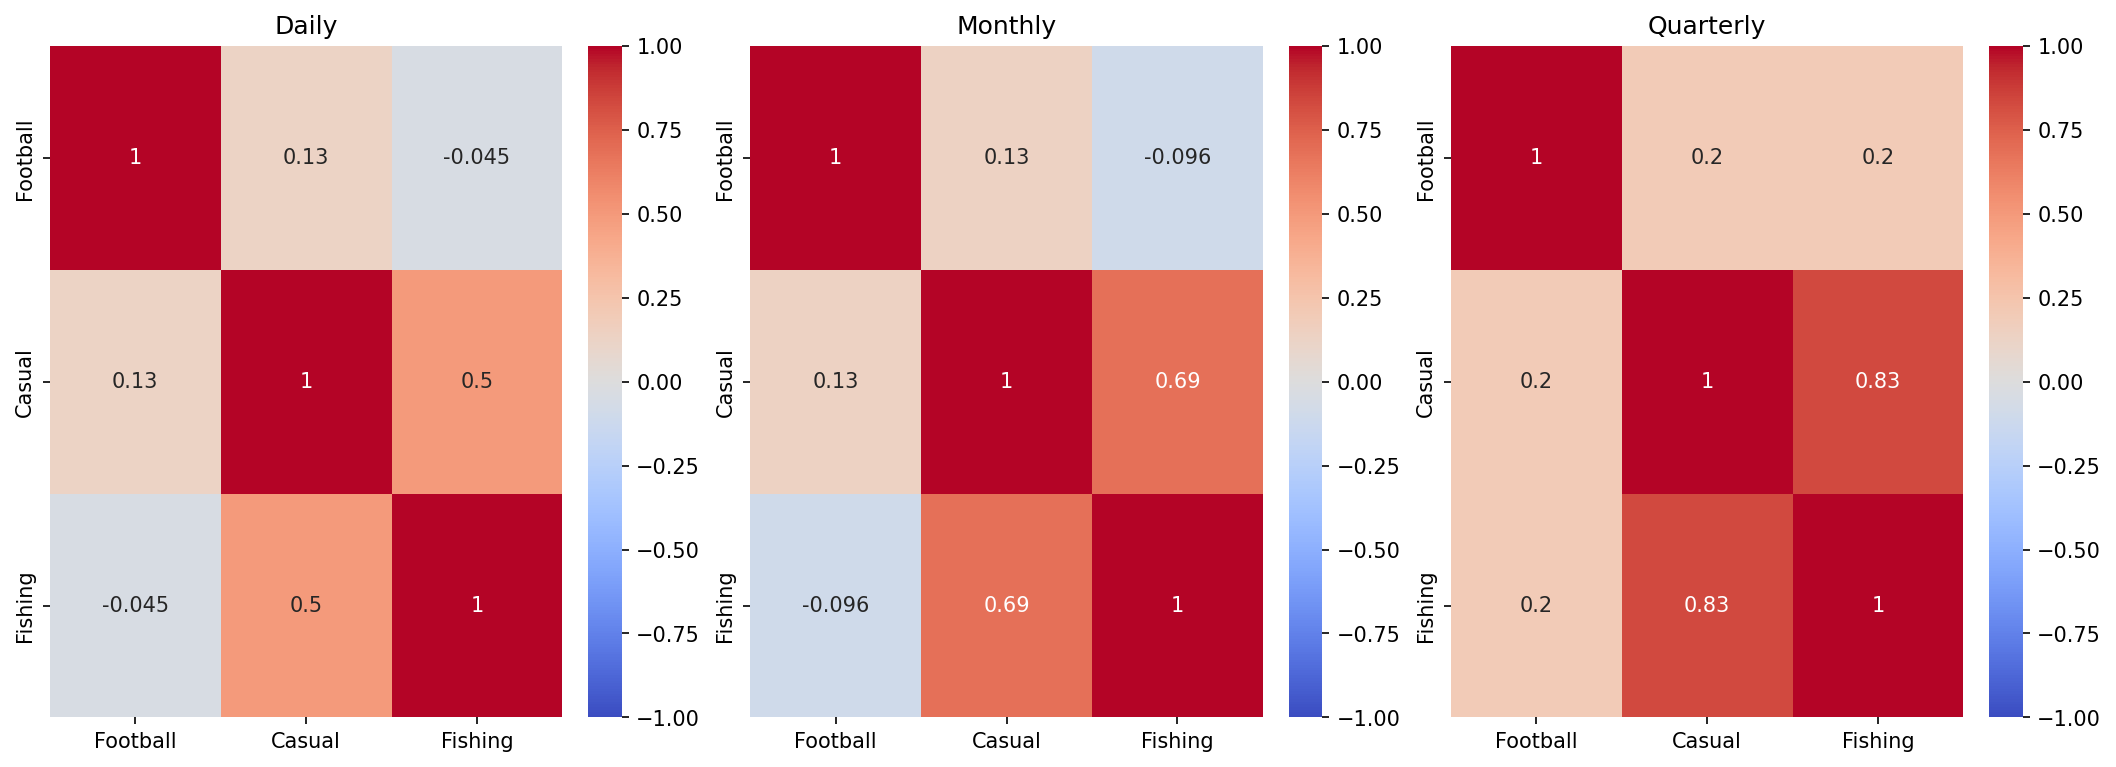

In [77]:
import seaborn as sns

weekly_corr = weekly.corr()
monthly_corr = monthly.drop(['Month', 'Year'], axis=1).corr()
trimestral_corr = trimestral.corr()

fig, ax = plt.subplots(1,3, layout='constrained', figsize=(14,5))

# Plot correlation matrix
sns.heatmap(weekly_corr, annot=True, cmap='coolwarm', ax=ax[0], vmin=-1, vmax=1)
sns.heatmap(monthly_corr, annot=True, cmap='coolwarm', ax=ax[1], vmin=-1, vmax=1)
sns.heatmap(trimestral_corr, annot=True, cmap='coolwarm', ax=ax[2], vmin=-1, vmax=1)

ax[0].set_title('Daily')
ax[1].set_title('Monthly')
ax[2].set_title('Quarterly')

Text(0.5, 1.0, 'Q4')

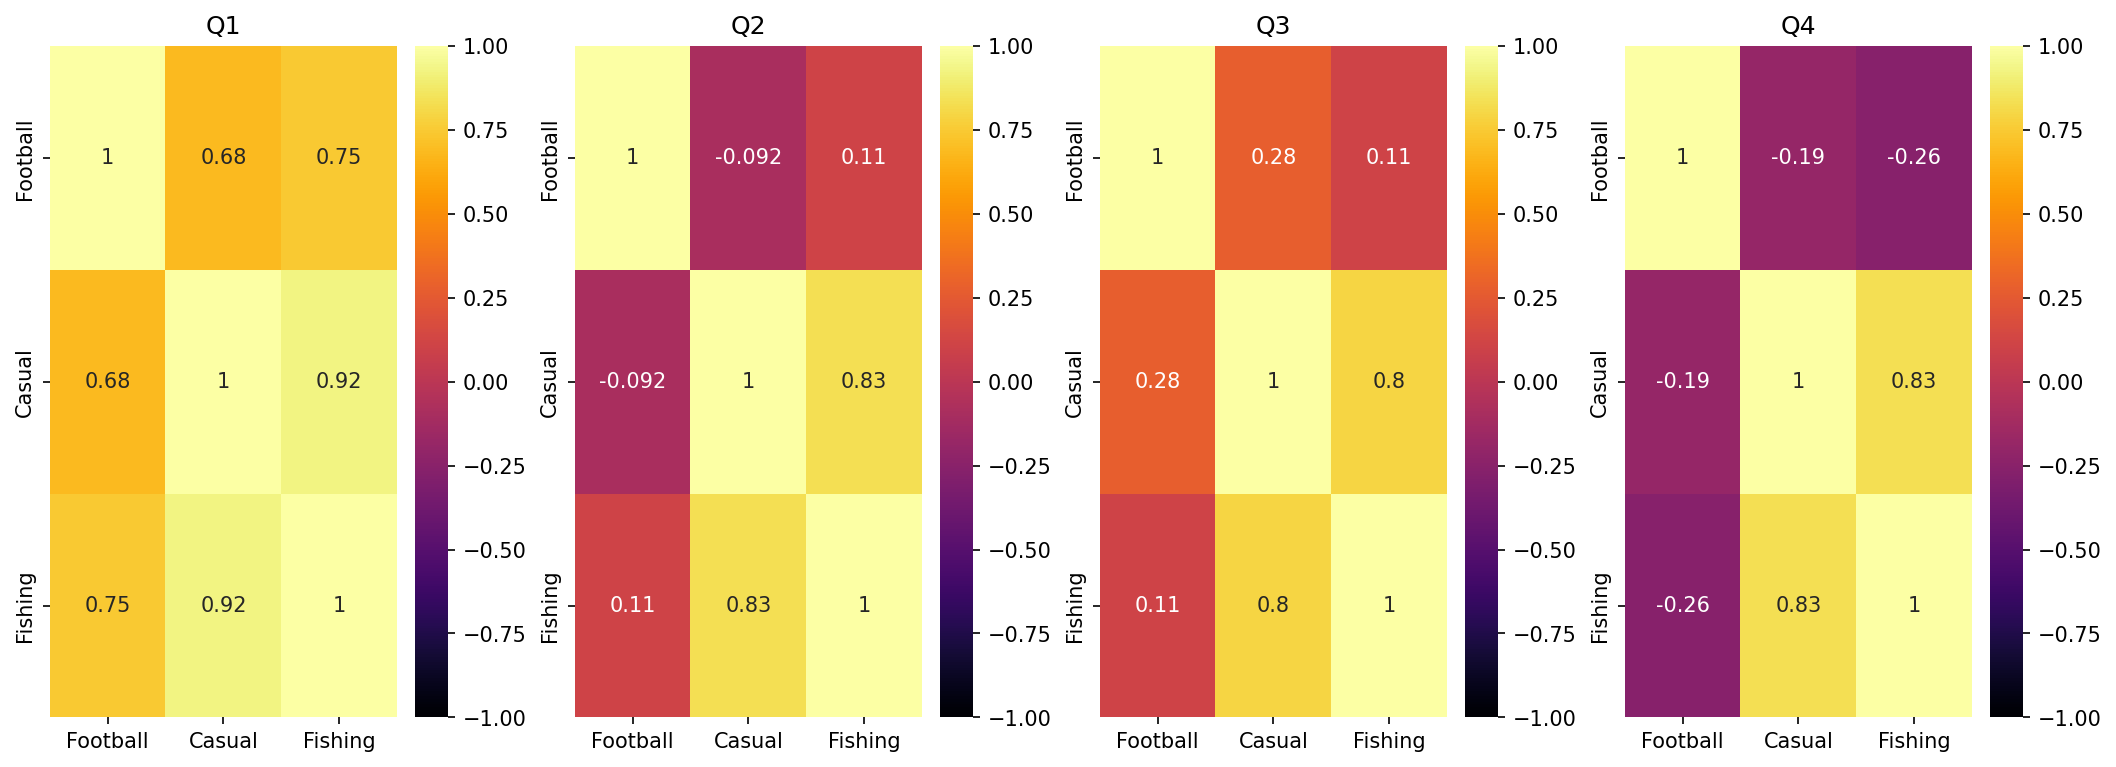

In [78]:
q1_corr = trimestral[trimestral['Quarter'] == 'Q1'].corr()
q2_corr = trimestral[trimestral['Quarter'] == 'Q2'].corr()
q3_corr = trimestral[trimestral['Quarter'] == 'Q3'].corr()
q4_corr = trimestral[trimestral['Quarter'] == 'Q4'].corr()

fig, ax = plt.subplots(1,4, layout='constrained', figsize=(14,5))

# Plot correlation matrix
sns.heatmap(q1_corr, annot=True, cmap='inferno', ax=ax[0], vmin=-1, vmax=1)
sns.heatmap(q2_corr, annot=True, cmap='inferno', ax=ax[1], vmin=-1, vmax=1)
sns.heatmap(q3_corr, annot=True, cmap='inferno', ax=ax[2], vmin=-1, vmax=1)
sns.heatmap(q4_corr, annot=True, cmap='inferno', ax=ax[3], vmin=-1, vmax=1)

ax[0].set_title('Q1')
ax[1].set_title('Q2')
ax[2].set_title('Q3')
ax[3].set_title('Q4')

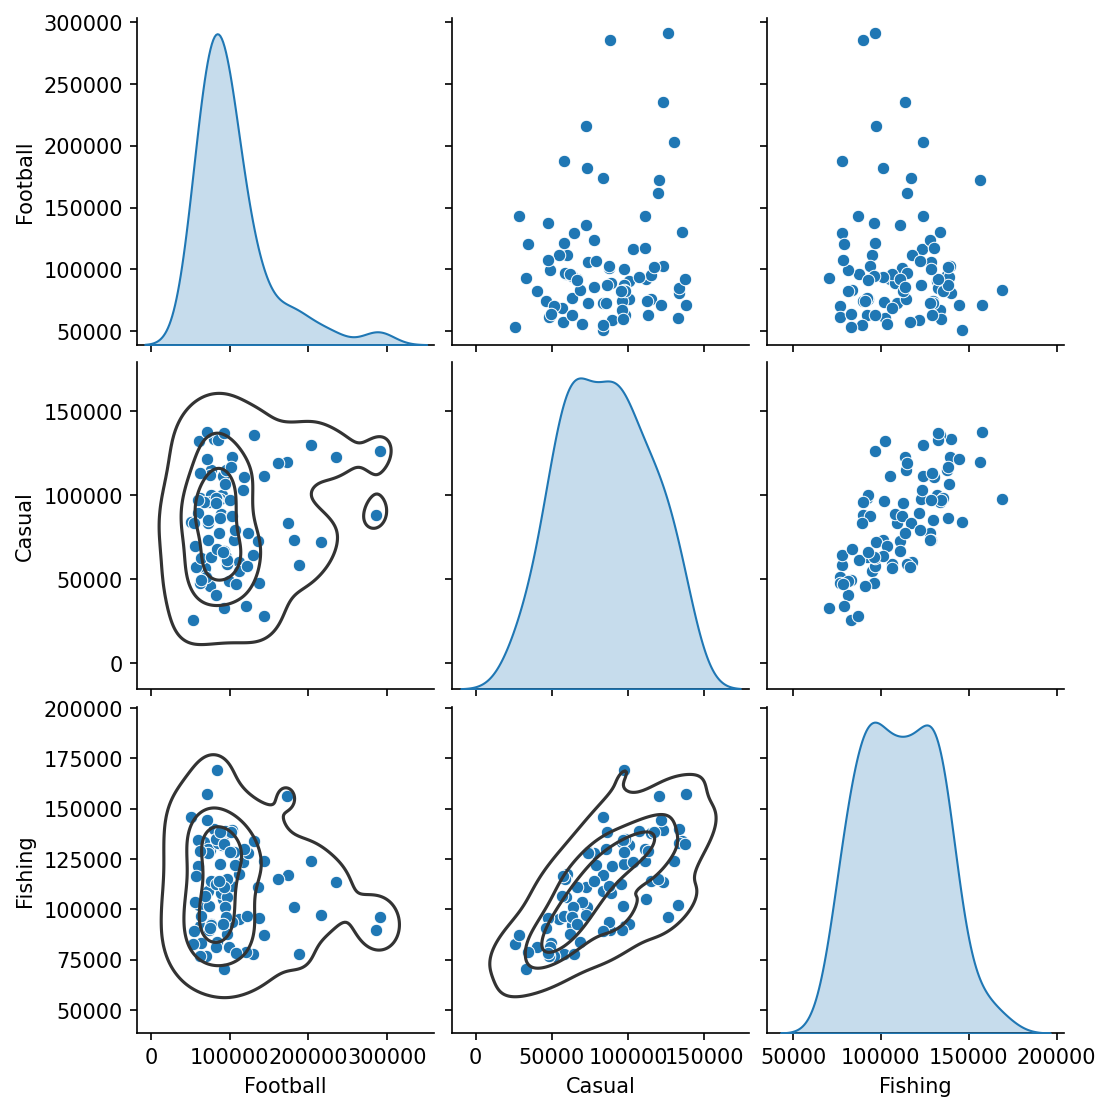

In [79]:
# Plot correlation matrix
g = sns.pairplot(monthly.drop(['Month', 'Year'], axis=1), diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

# Set plot properties
#plt.title('Correlation Matrix')
plt.show()

## Classical approach

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

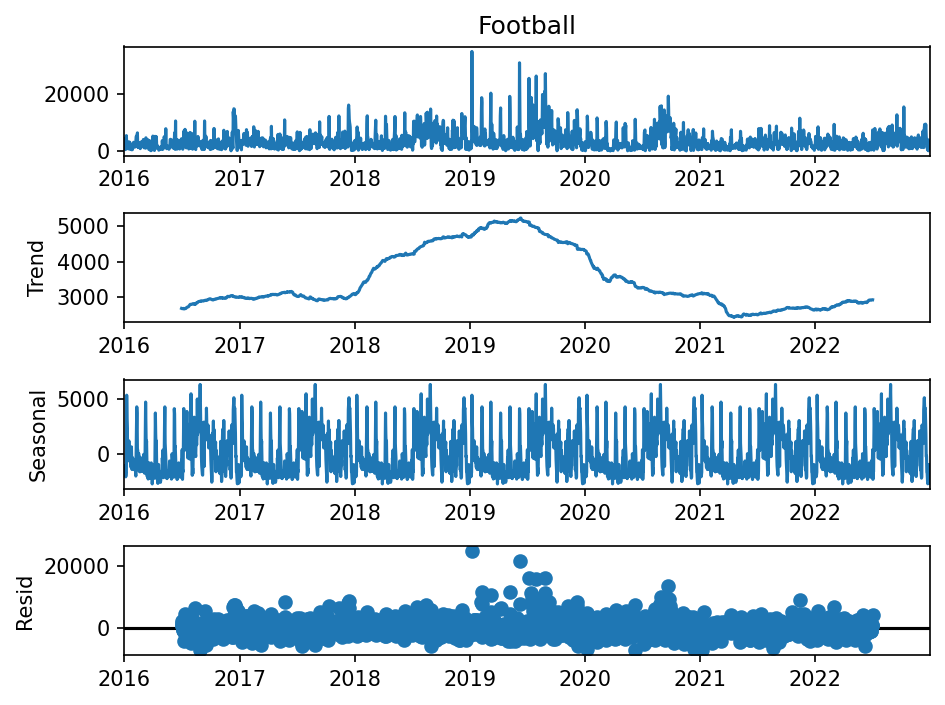

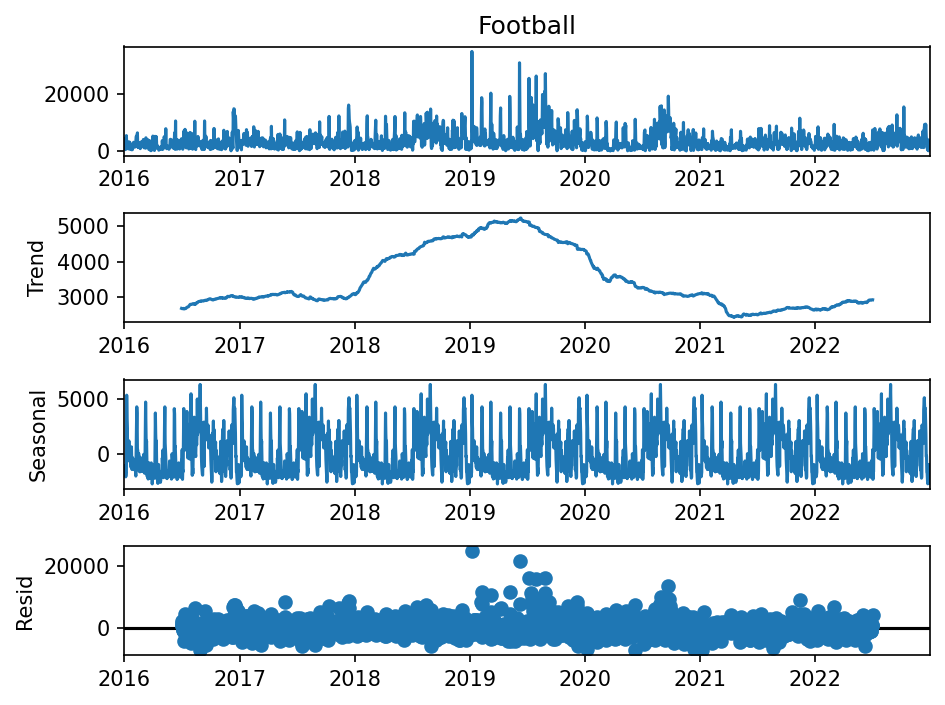

In [81]:
sm.tsa.seasonal_decompose(daily['Football'], period=365).plot()

<AxesSubplot:xlabel='data'>

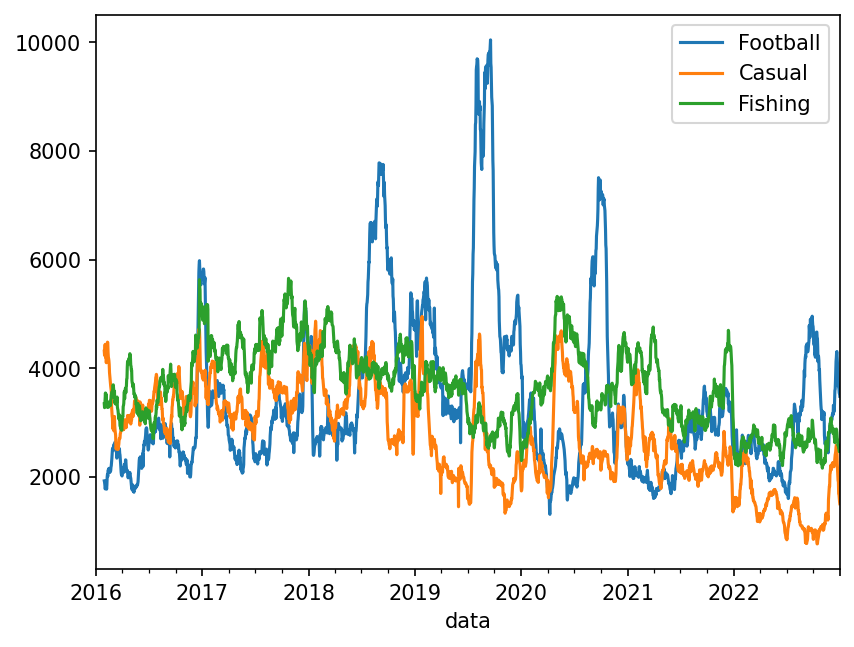

In [84]:
mm30.plot()

<AxesSubplot:xlabel='data'>

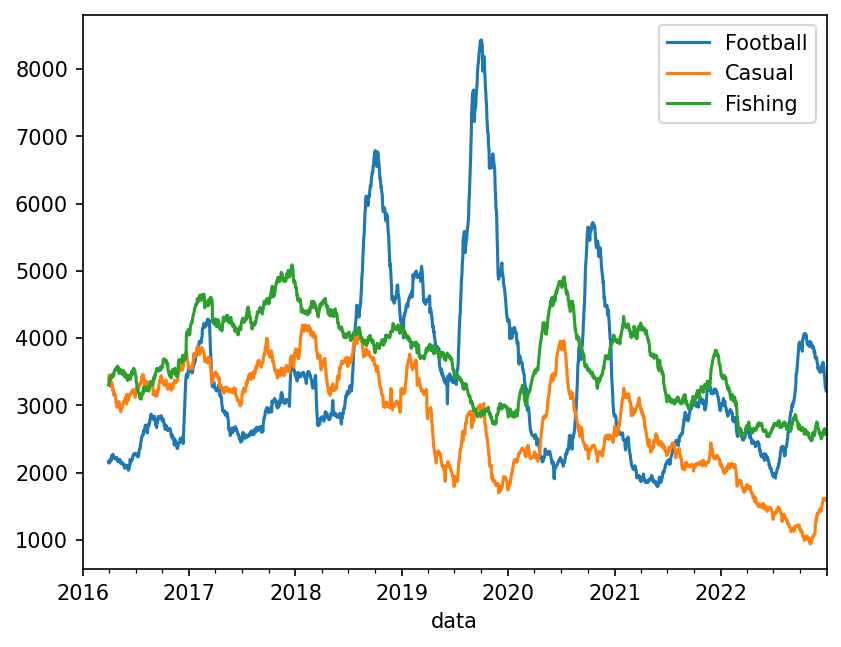

In [85]:
mm90.plot()

## Modern approach

### Daily

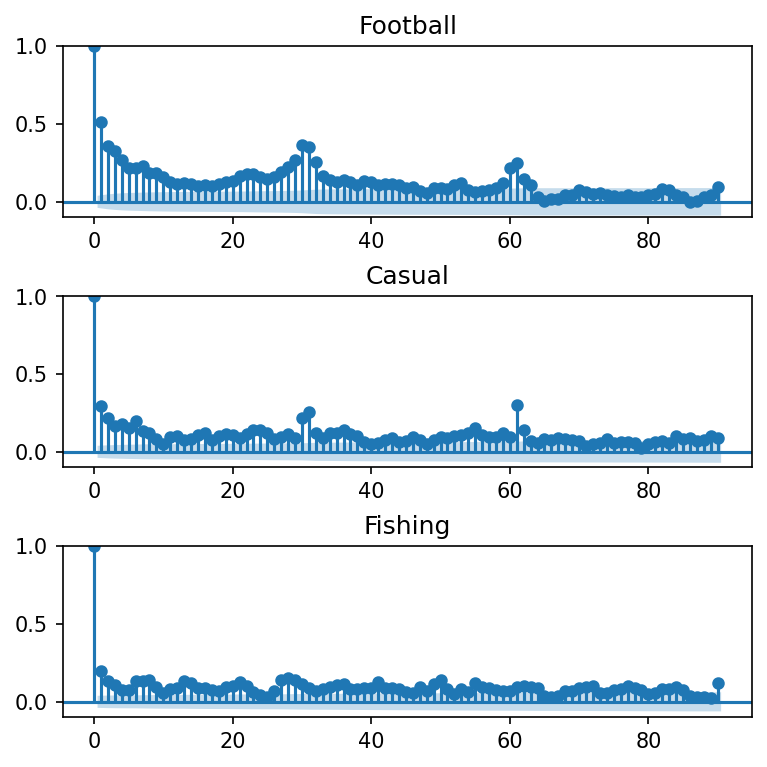

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(3, 1, layout='constrained', figsize=(5,5)) 

for i, col in enumerate(daily.columns):
    plot_acf(daily[col], lags=90, ax=ax[i])
    ax[i].set_ylim(-0.1, 1)
    ax[i].set_title(col)

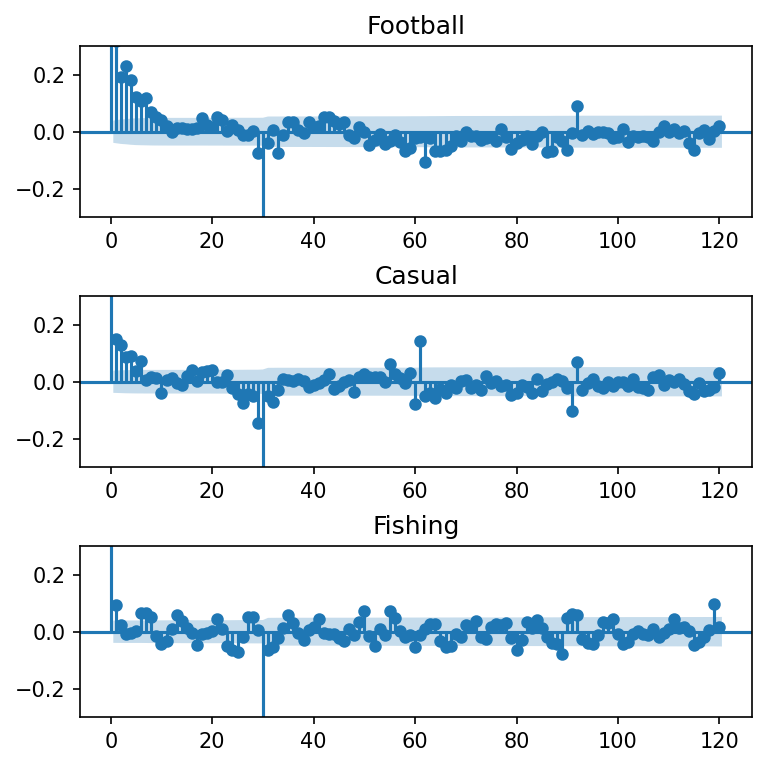

In [57]:
fig, ax = plt.subplots(3,1, layout='constrained', figsize=(5,5))

for i, col in enumerate(daily.columns):
    plot_acf(daily[col].diff(30).dropna(), lags=120, ax=ax[i])
    ax[i].set_ylim(-0.3, 0.3)
    ax[i].set_title(col)

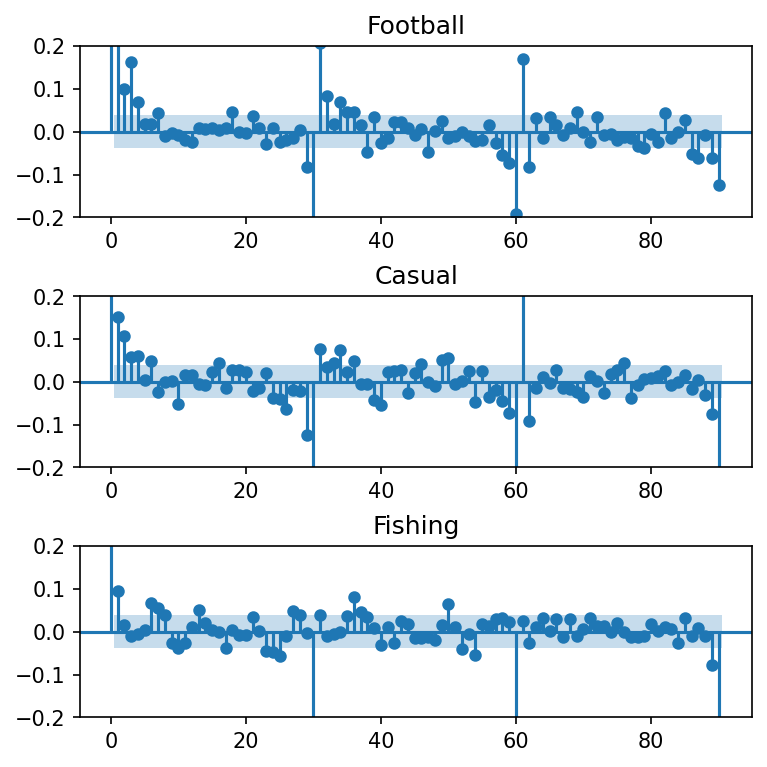

In [56]:
fig, ax = plt.subplots(3,1, layout='constrained', figsize=(5,5))

for i, col in enumerate(daily.columns):
    plot_pacf(daily[col].diff(30).dropna(), lags=90, ax=ax[i])
    ax[i].set_ylim(-0.2, 0.2)
    ax[i].set_title(col)

### Weekly

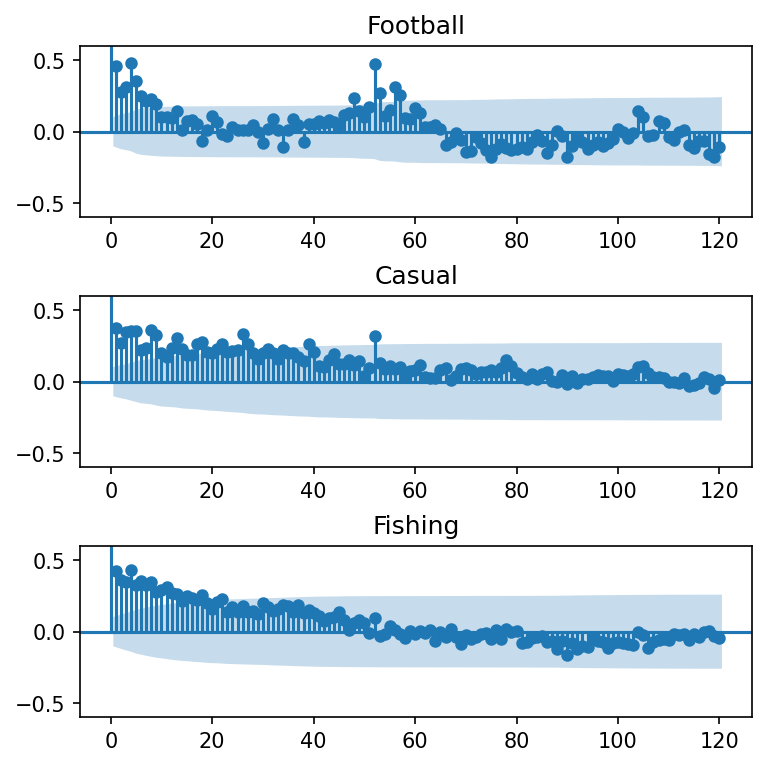

In [87]:
fig, ax = plt.subplots(3, 1, layout='constrained', figsize=(5,5)) 

for i, col in enumerate(daily.columns):
    plot_acf(weekly[col], lags=120, ax=ax[i])
    ax[i].set_ylim(-0.6, 0.6)
    ax[i].set_title(col)

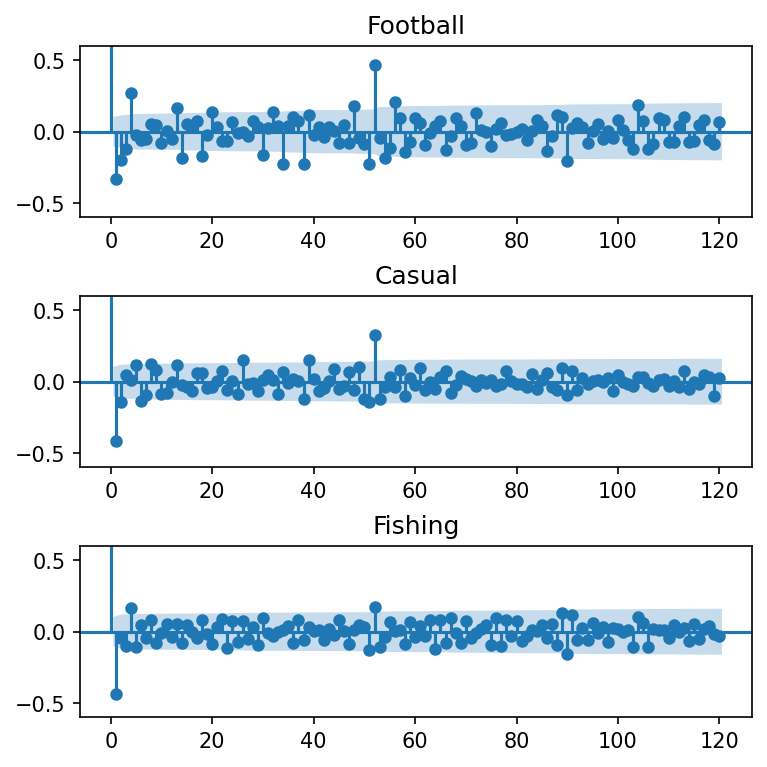

In [91]:
fig, ax = plt.subplots(3,1, layout='constrained', figsize=(5,5))

for i, col in enumerate(daily.columns):
    plot_acf(weekly[col].diff().dropna(), lags=120, ax=ax[i])
    ax[i].set_ylim(-0.6, 0.6)
    ax[i].set_title(col)

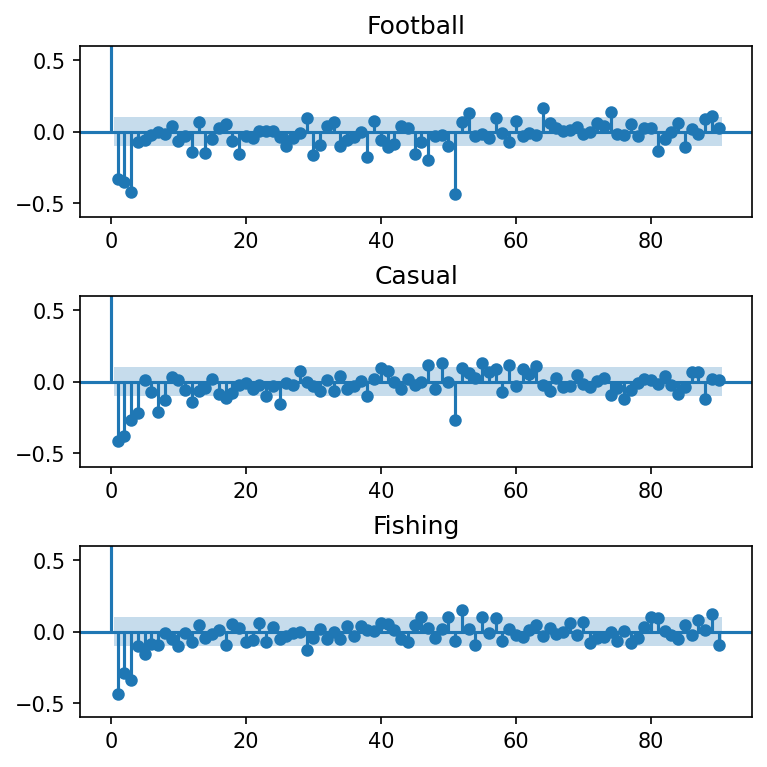

In [93]:
fig, ax = plt.subplots(3,1, layout='constrained', figsize=(5,5))

for i, col in enumerate(daily.columns):
    plot_pacf(weekly[col].diff().dropna(), lags=90, ax=ax[i])
    ax[i].set_ylim(-0.6, 0.6)
    ax[i].set_title(col)

### Monthly

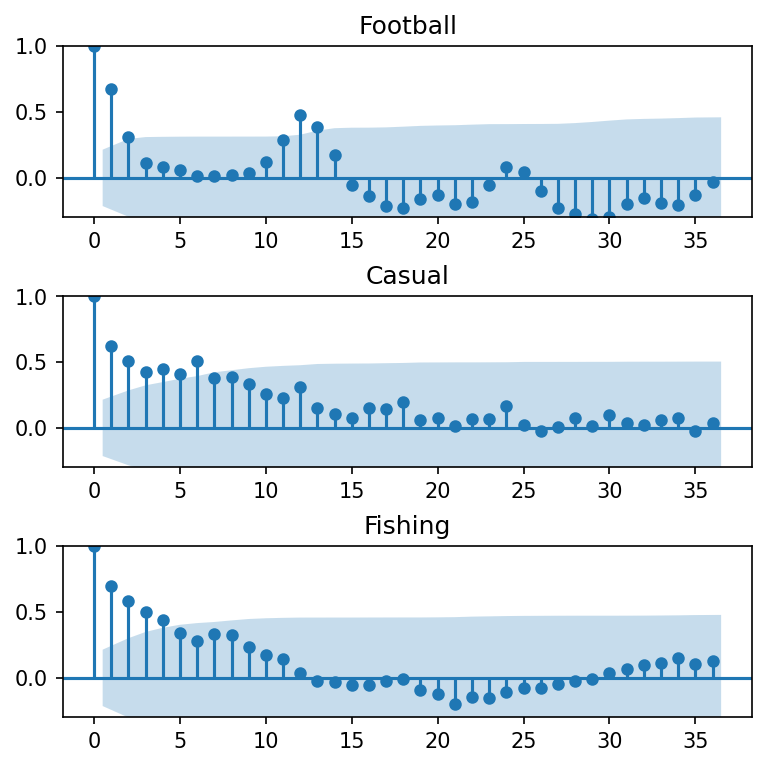

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(3,1, layout='constrained', figsize=(5,5))

for i, col in enumerate(daily.columns):
    plot_acf(monthly[col], lags=36, ax=ax[i])
    ax[i].set_ylim(-0.3, 1)
    ax[i].set_title(col)

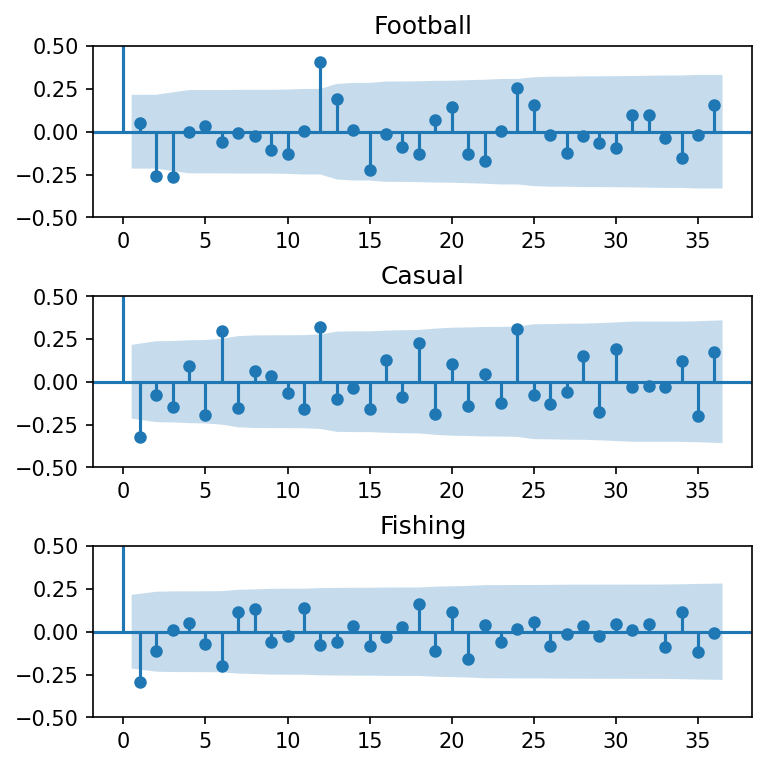

In [29]:
fig, ax = plt.subplots(3,1, layout='constrained', figsize=(5,5))

for i, col in enumerate(daily.columns):
    plot_acf(monthly[col].diff().dropna(), lags=36, ax=ax[i])
    ax[i].set_ylim(-0.5, 0.5)
    ax[i].set_title(col)

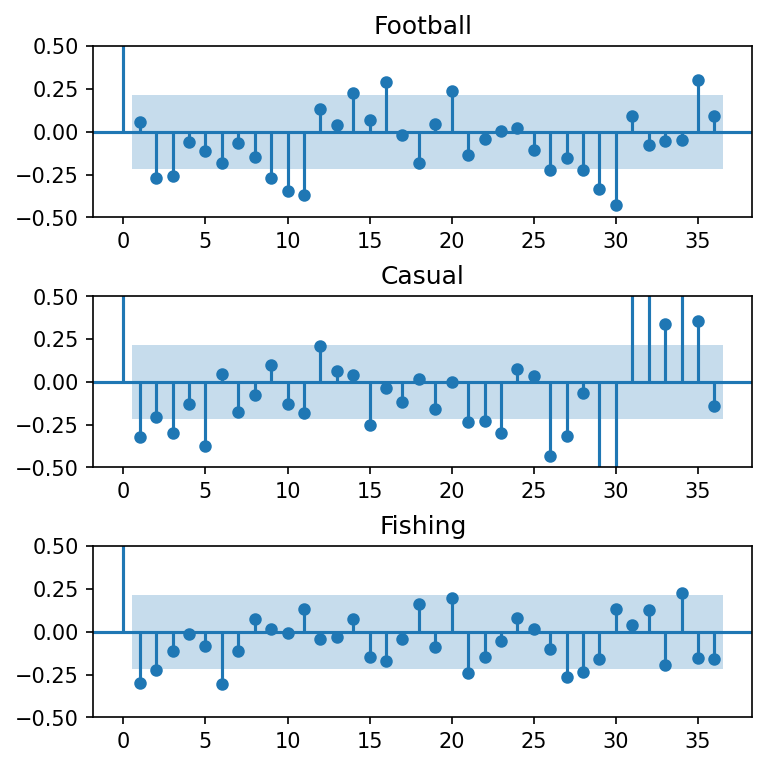

In [41]:
fig, ax = plt.subplots(3,1, layout='constrained', figsize=(5,5))

for i, col in enumerate(daily.columns):
    plot_pacf(monthly[col].diff().dropna(), lags=36, ax=ax[i])
    ax[i].set_ylim(-0.5, 0.5)
    ax[i].set_title(col)

### Trimestral

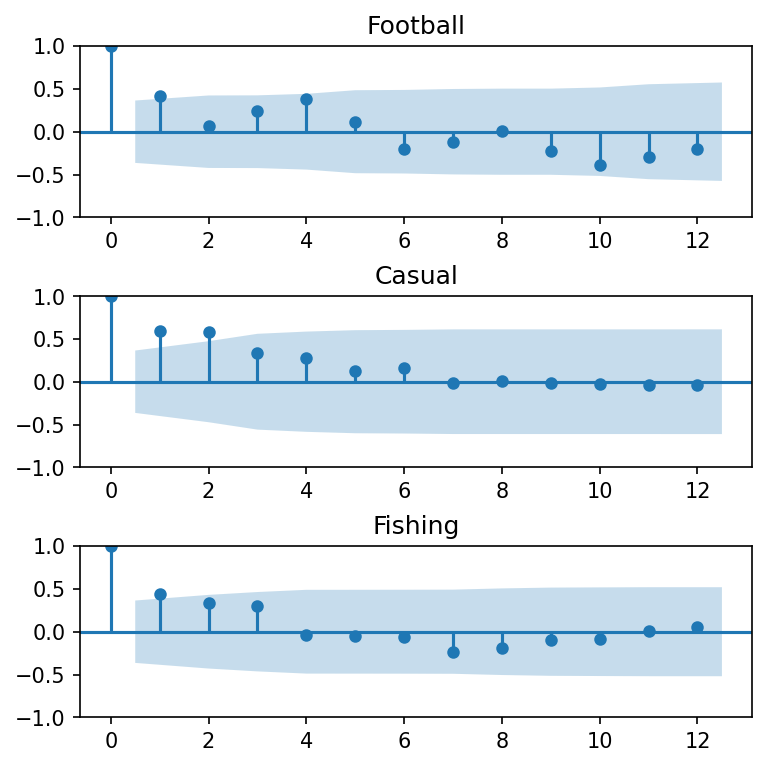

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(3,1, layout='constrained', figsize=(5,5))

for i, col in enumerate(daily.columns):
    plot_acf(trimestral[col], lags=12, ax=ax[i])
    ax[i].set_ylim(-1, 1)
    ax[i].set_title(col)

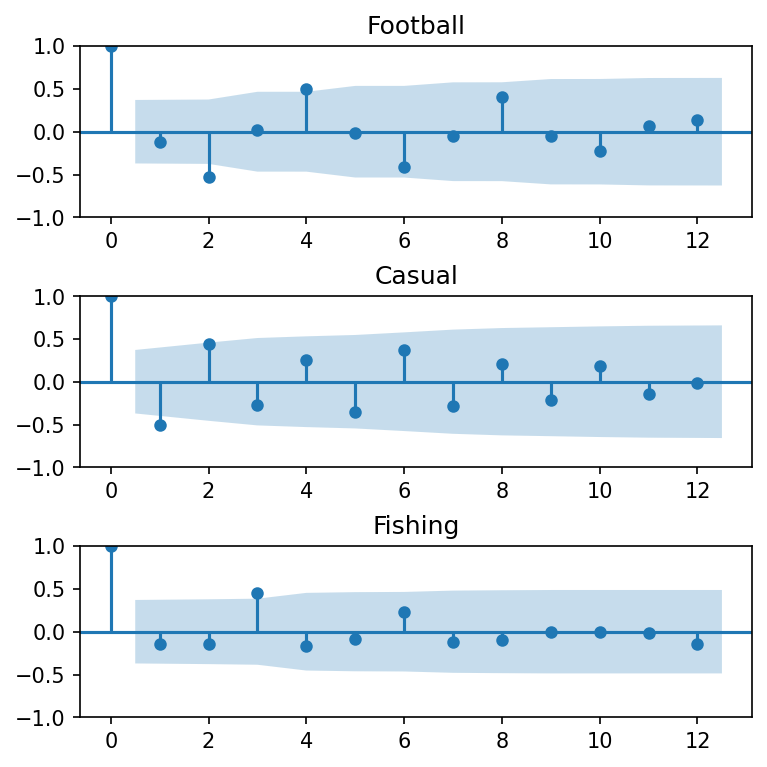

In [32]:
fig, ax = plt.subplots(3,1, layout='constrained', figsize=(5,5))

for i, col in enumerate(daily.columns):
    plot_acf(trimestral[col].diff().dropna(), lags=12, ax=ax[i])
    ax[i].set_ylim(-1, 1)
    ax[i].set_title(col)

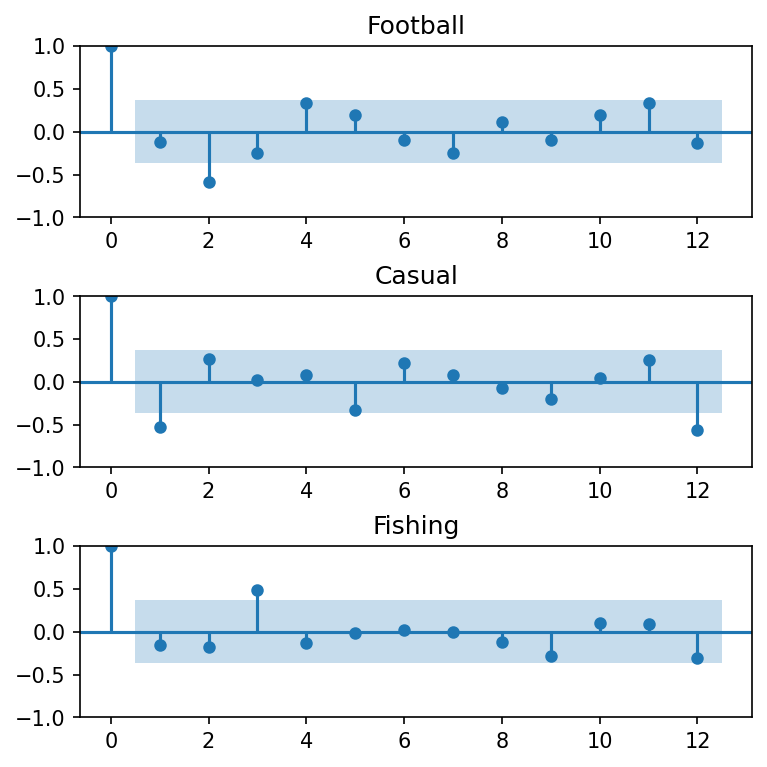

In [33]:
fig, ax = plt.subplots(3,1, layout='constrained', figsize=(5,5))

for i, col in enumerate(daily.columns):
    plot_pacf(trimestral[col].diff().dropna(), lags=12, ax=ax[i])
    ax[i].set_ylim(-1, 1)
    ax[i].set_title(col)